### installations 
command line 

- conda activate beesjun21 (your env name)
- pymysql    conda install -c anaconda pymysql 
- sqlalchemy   conda install -c anaconda sqlalchemy

### connecting to mysql from python 

In [1]:
import pymysql 
from sqlalchemy import create_engine 
import pandas as pd 


In [2]:
import getpass # to get the password without it being visible 

In [3]:
mysqlpassword= getpass.getpass()

········


In [4]:
#define a connection string 
# dialect + driver :// username : password @host(domain) : db name 

connection_string = 'mysql+pymysql://root:' + mysqlpassword + '@localhost/bank'
engine= create_engine(connection_string)

### Initial query on loans to check everything works 

In [5]:
# dataframe creation 

df= pd.read_sql_query('Select * from loan', engine )

In [6]:
df

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A
...,...,...,...,...,...,...,...
677,4989,105,981205,352704,48,7348.0,C
678,5221,1284,981205,52512,12,4376.0,C
679,6402,6922,981206,139488,24,5812.0,C
680,5346,1928,981206,55632,24,2318.0,C


### aggregated query to select summary rows of loans 

In [7]:
dloans=pd.read_sql_query('''select 
d.A2 as districtname, d.A3 as region,
sum(l.amount) as totalborrrowed, 
count(l.loan_id) as noofloanstaken,
round(avg(l.amount)) as avgloanvalue
 from loan l
join account a using(account_id)
join district d on 
a.district_id= d.A1
group by d.A2, d.A3
order by sum(l.amount) DESC
limit 30''',engine)

In [8]:
dloans

,districtname,region,totalborrrowed,noofloanstaken,avgloanvalue
0,Hl.m. Praha,Prague,12932412.0,84,153957.0
1,Brno - mesto,south Moravia,4049400.0,24,168725.0
2,Ostrava - mesto,north Moravia,3260220.0,20,163011.0
3,Karvina,north Moravia,3059820.0,24,127493.0
4,Zlin,south Moravia,3012768.0,17,177222.0
5,Prachatice,south Bohemia,2356692.0,14,168335.0
6,Olomouc,north Moravia,2287596.0,14,163400.0
7,Usti nad Orlici,east Bohemia,2213160.0,14,158083.0
8,Svitavy,east Bohemia,2100084.0,12,175007.0
9,Kutna Hora,central Bohemia,2095980.0,9,232887.0


In [9]:
dloans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   districtname    30 non-null     object 
 1   region          30 non-null     object 
 2   totalborrrowed  30 non-null     float64
 3   noofloanstaken  30 non-null     int64  
 4   avgloanvalue    30 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.3+ KB


## next - visualisation!

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns 

#defining the question 
# right chart type / aggreg to answer the question 

<AxesSubplot:>

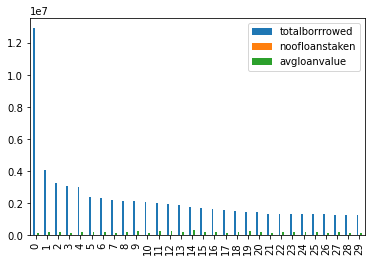

In [11]:
plotdata= dloans
plotdata.plot(kind="bar")

<AxesSubplot:xlabel='totalborrrowed', ylabel='avgloanvalue'>

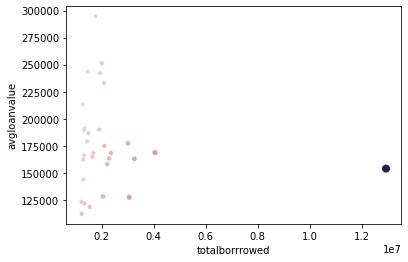

In [12]:
#Q: whats the relationship between no of loans, size of loans per district ? 
sns.scatterplot(x='totalborrrowed', y= 'avgloanvalue',
                hue ='noofloanstaken', size = 'noofloanstaken', legend = 0, data = dloans)

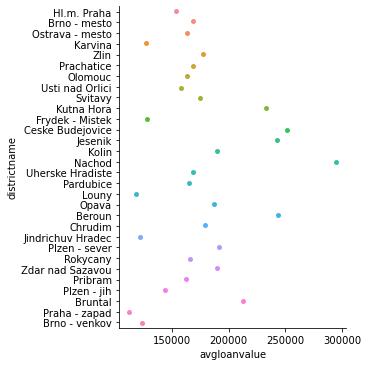

In [13]:
#Q: in which district have we lent the most ? 

sns.catplot(y="districtname", x="avgloanvalue", data=dloans)

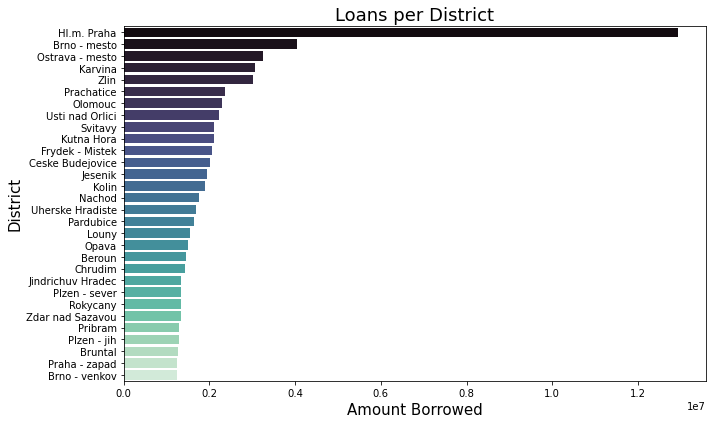

In [14]:
#Q: in which district have we lent the most ? a better chart 

plt.figure(figsize=(10,6))
sns_plot = sns.barplot(y='districtname',x ='totalborrrowed', data = dloans, palette = "mako", order=dloans.sort_values('totalborrrowed', ascending = False).districtname)
# set labels
plt.xlabel("Amount Borrowed", size=15)
plt.ylabel("District", size=15)
plt.title("Loans per District", size=18)
plt.tight_layout()

#export image 
plt.savefig("loansdistrict.png", dpi=100)

In [15]:
dloans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   districtname    30 non-null     object 
 1   region          30 non-null     object 
 2   totalborrrowed  30 non-null     float64
 3   noofloanstaken  30 non-null     int64  
 4   avgloanvalue    30 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.3+ KB


### adding a specified size to the visual frame 

In [16]:
filtered=dloans[dloans['region']!= 'Prague']

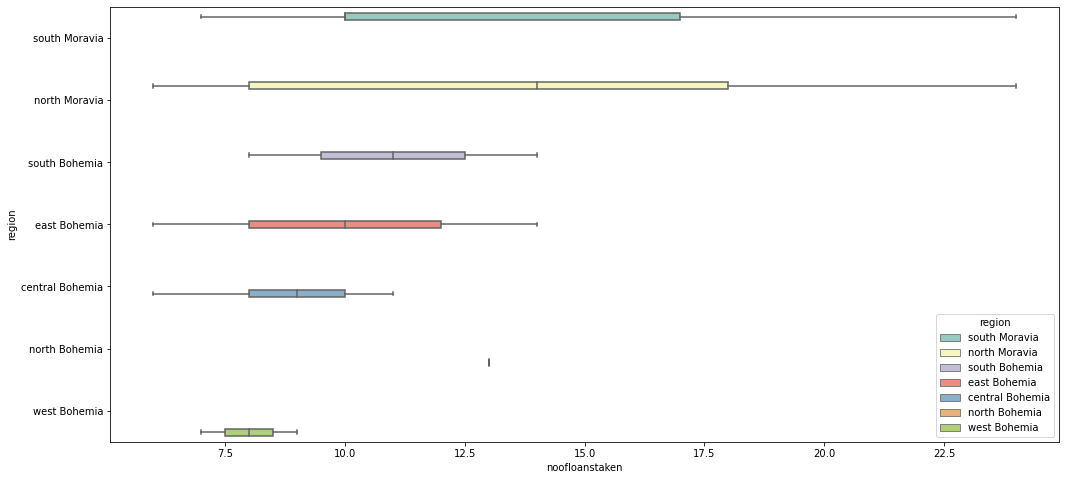

In [42]:
fig = plt.figure(figsize=(17,8))

ax = sns.boxplot(x ="noofloanstaken", y = "region", hue = "region",
                 data = filtered, palette = "Set3")

### Can we do churn analysis without a complex sql query ?

In [43]:
#note we dont want to just join trans to loans and pull back all the data, as the trans table is very big 
#we do need the join anyway, thats unavoidable 

statuses=pd.read_sql_query('''select l.status, t.date,
count(distinct t.account_id) as noofaccounts,
count(distinct t.trans_id) as nooftrans,
sum(t.amount) as movedamount 
from trans t
join disp d using (account_id) 
join loan l using (account_id) 
where d.type = 'OWNER'
group by l.status, t.date''',engine)

In [56]:
statuses.head(20)

,status,date,noofaccounts,nooftrans,movedamount,M-Y,statusgroup
0,A,930114,2,2,45749.000000,9301,goodloans
1,A,930117,1,1,1100.000000,9301,goodloans
2,A,930119,1,1,700.000000,9301,goodloans
3,A,930124,1,1,900.000000,9301,goodloans
4,A,930125,1,1,900.000000,9301,goodloans
5,A,930130,1,1,1000.000000,9301,goodloans
6,A,930131,2,3,5392.999997,9301,goodloans
7,A,930204,1,1,300.000000,9302,goodloans
8,A,930205,1,1,7618.000000,9302,goodloans
9,A,930207,2,2,14693.000000,9302,goodloans


In [45]:
statuses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7615 entries, 0 to 7614
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   status        7615 non-null   object 
 1   date          7615 non-null   int64  
 2   noofaccounts  7615 non-null   int64  
 3   nooftrans     7615 non-null   int64  
 4   movedamount   7615 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 297.6+ KB


In [ ]:
statuses.to_csv('statuses.csv', index=False)
#extract to csv to visualise in tableau - covert date to date type

In [ ]:
# OR prepare data a little in python to visualise the trend 

In [46]:
#extract month and year from date field 

statuses['date'] = statuses['date'].astype(str)

statuses['M-Y'] = statuses[str('date')].str[:4] 

<AxesSubplot:xlabel='M-Y', ylabel='noofaccounts'>

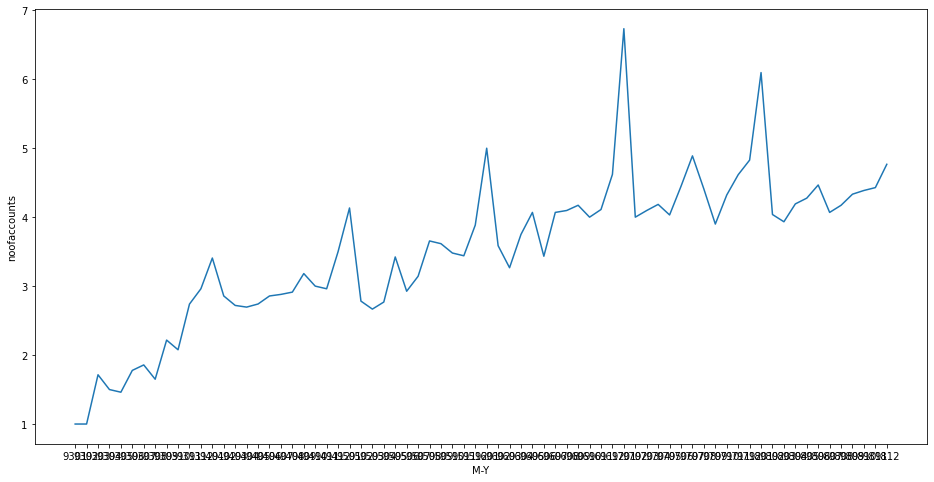

In [53]:
b_status = statuses.query("status == 'B'")
fig = plt.figure(figsize=(16, 8))
sns.lineplot(data=b_status, x="M-Y", y="noofaccounts", ci= None)

In [ ]:
b_status = statuses.query("status == 'A'")
fig = plt.figure(figsize=(16, 8))
sns.lineplot(data=b_status, x="M-Y", y="movedamount", ci= None)

In [54]:
#group the loan statuses - create function
def statusgroup(x):
    if x in ['B', 'D']:
        return 'badloans'
    else:
        return 'goodloans'

In [55]:
# apply this to a new column using list map 
statuses['statusgroup']= list(map(statusgroup,statuses['status']))

In [57]:
#create a group by df 
grouped=statuses.groupby(["M-Y", "statusgroup"])["nooftrans"].sum()
grouped.head(10)

M-Y   statusgroup
9301  badloans         3
      goodloans       10
9302  badloans         3
      goodloans       42
9303  badloans        13
      goodloans       86
9304  badloans        18
      goodloans      127
9305  badloans        27
      goodloans      182
Name: nooftrans, dtype: int64

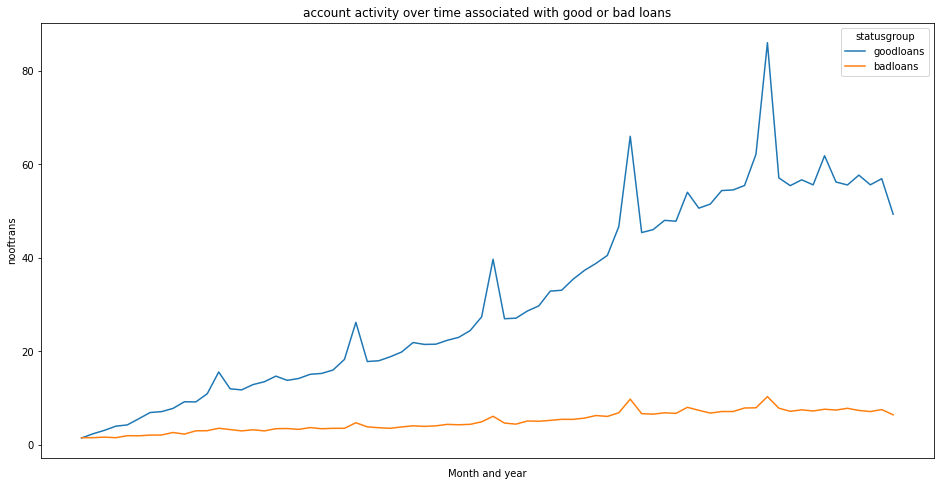

In [64]:
fig = plt.figure(figsize=(16, 8))
g=sns.lineplot(data=statuses, x="M-Y", y="nooftrans", hue="statusgroup", ci= None)
g.set(xticklabels=[])
g.set(xlabel='Month and year')
g.set(title='account activity over time associated with good or bad loans')
g.tick_params(bottom=False)
plt.show()